In [36]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import random
from PIL import Image
df = pd.read_csv("image_vectors_with_clusters.csv")
df = df[["file_name", "kmeans_labels", 'X', 'Y']]

Text(0, 0.5, 'UMAP Component 2')

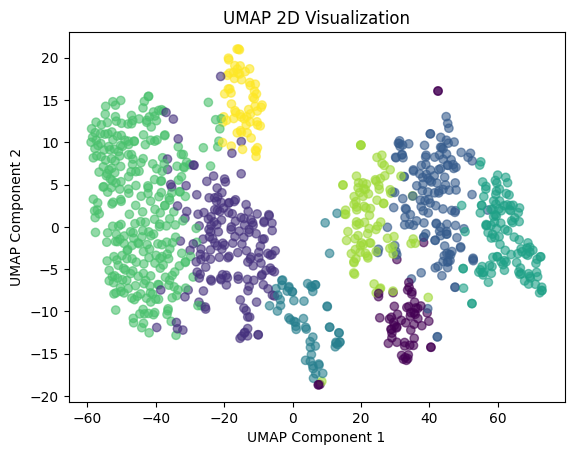

In [37]:
plt.scatter(df["X"], df["Y"], c=df["kmeans_labels"], cmap='viridis', alpha=0.6)
plt.title('UMAP 2D Visualization')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

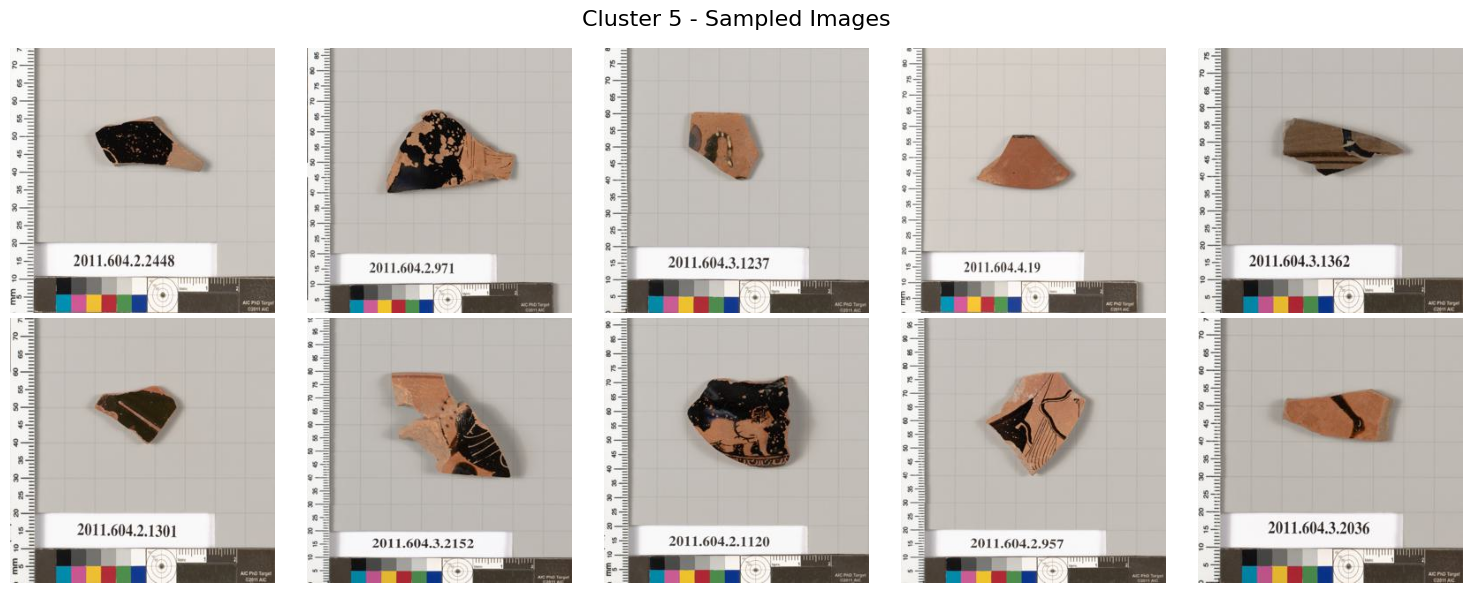

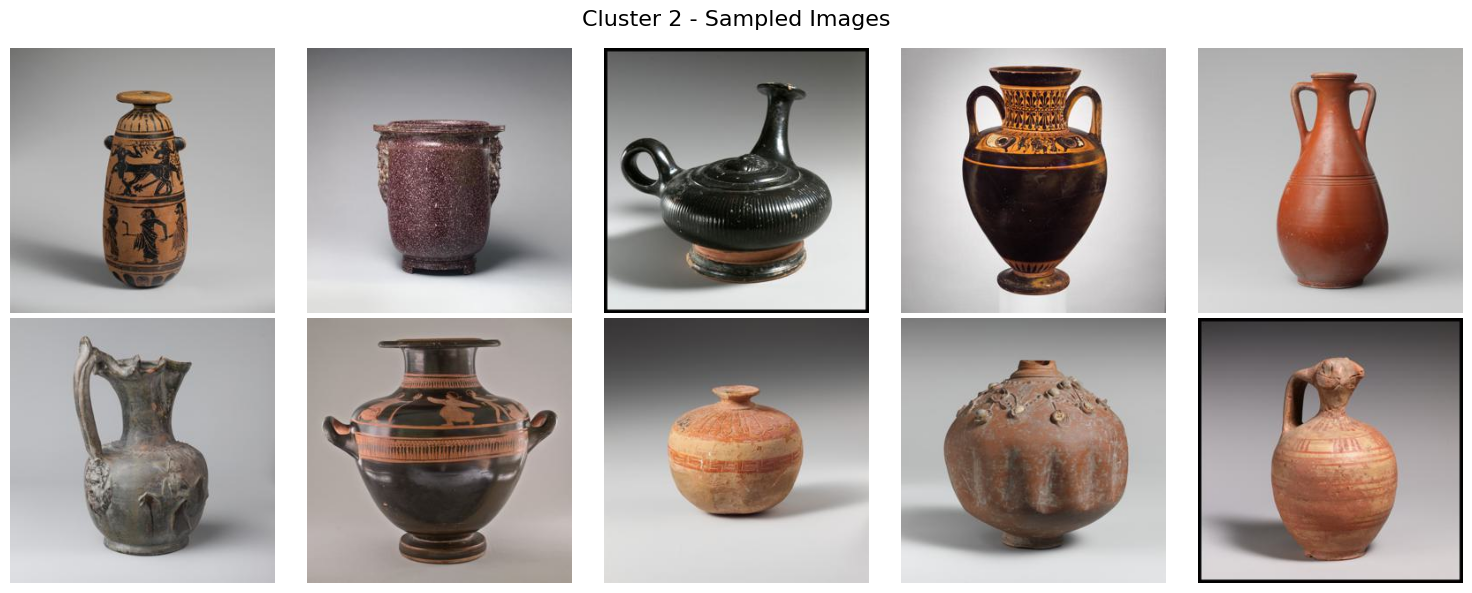

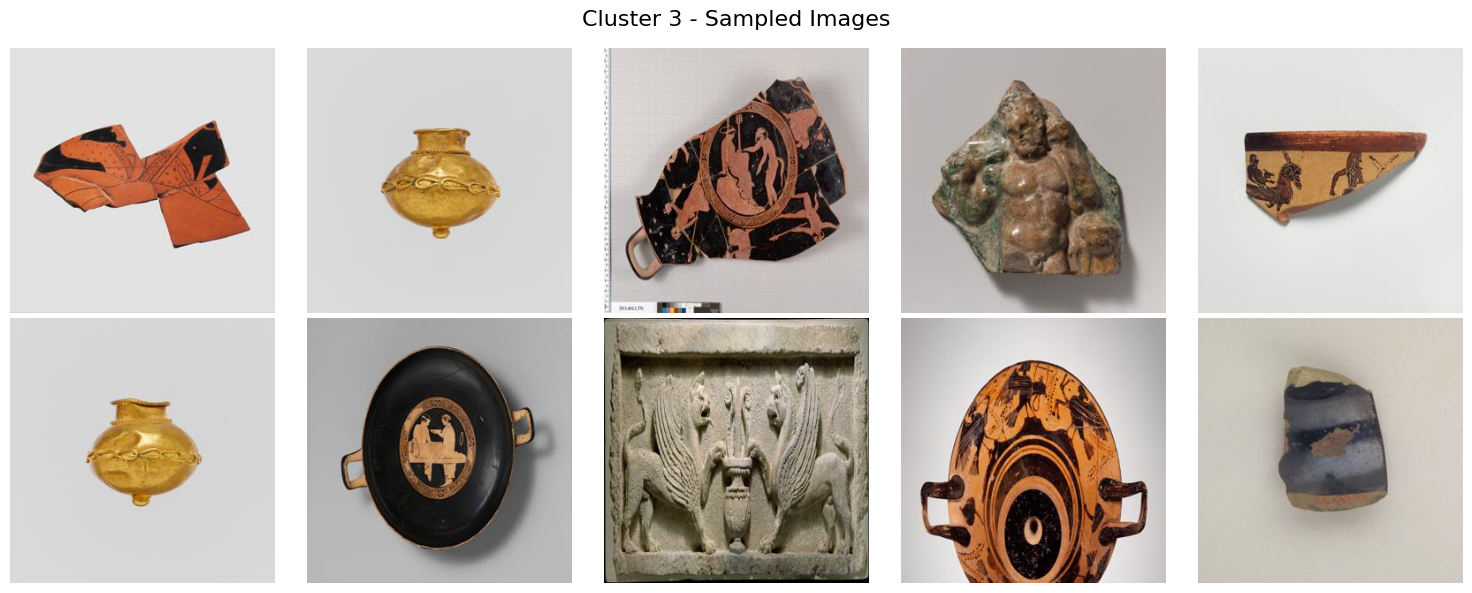

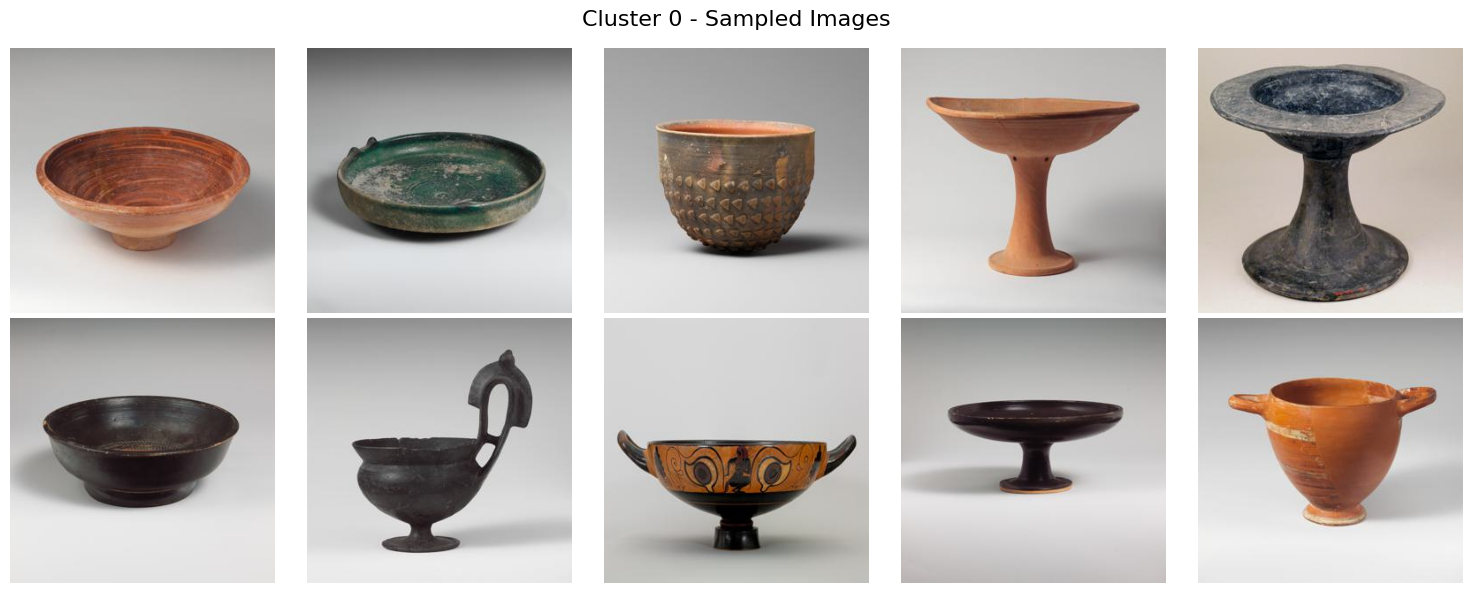

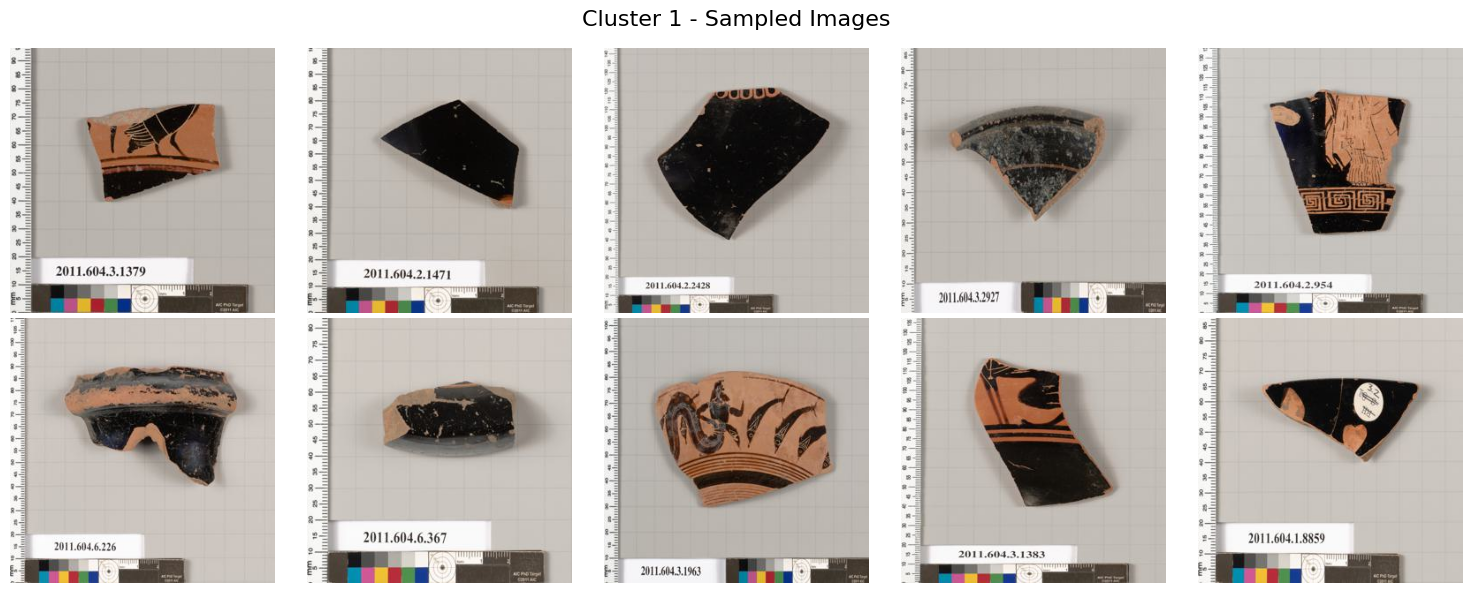

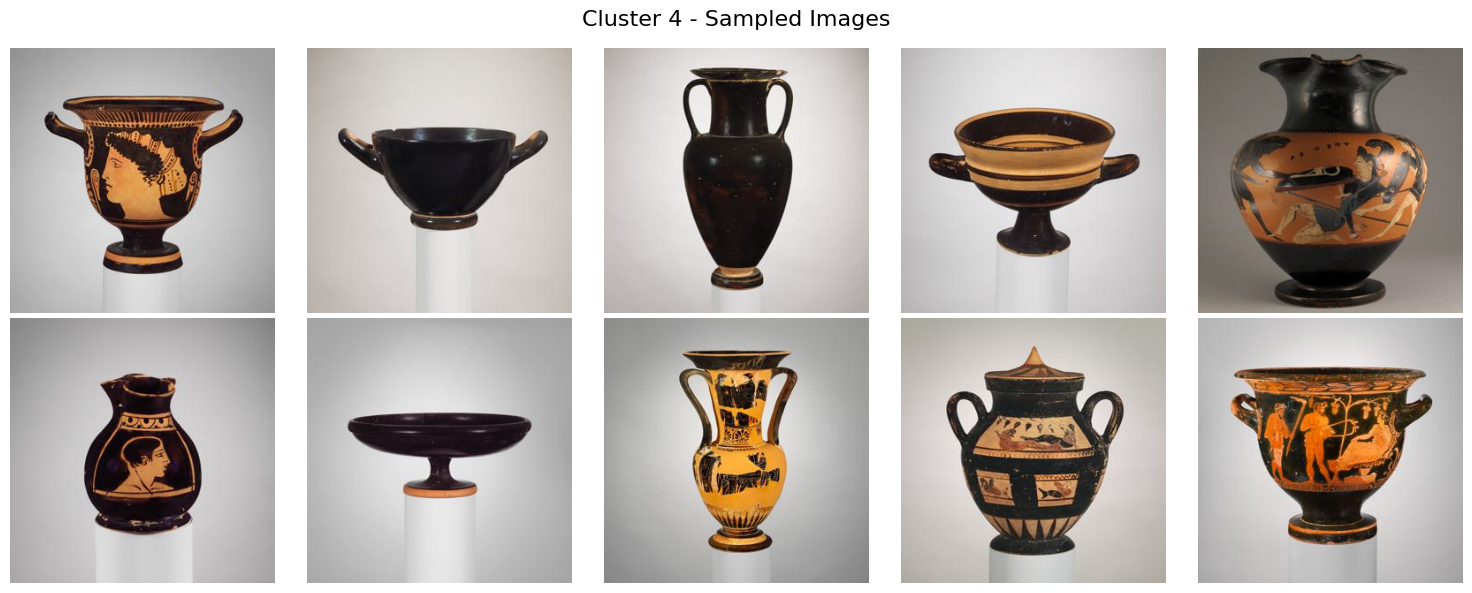

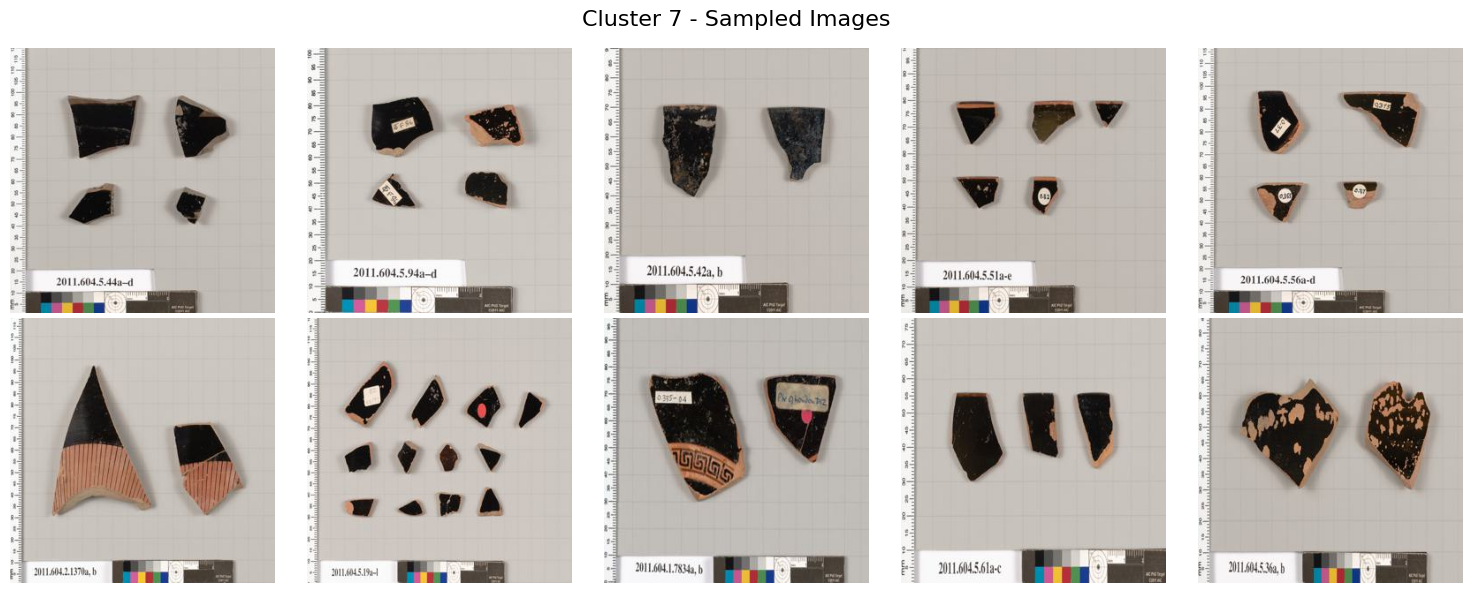

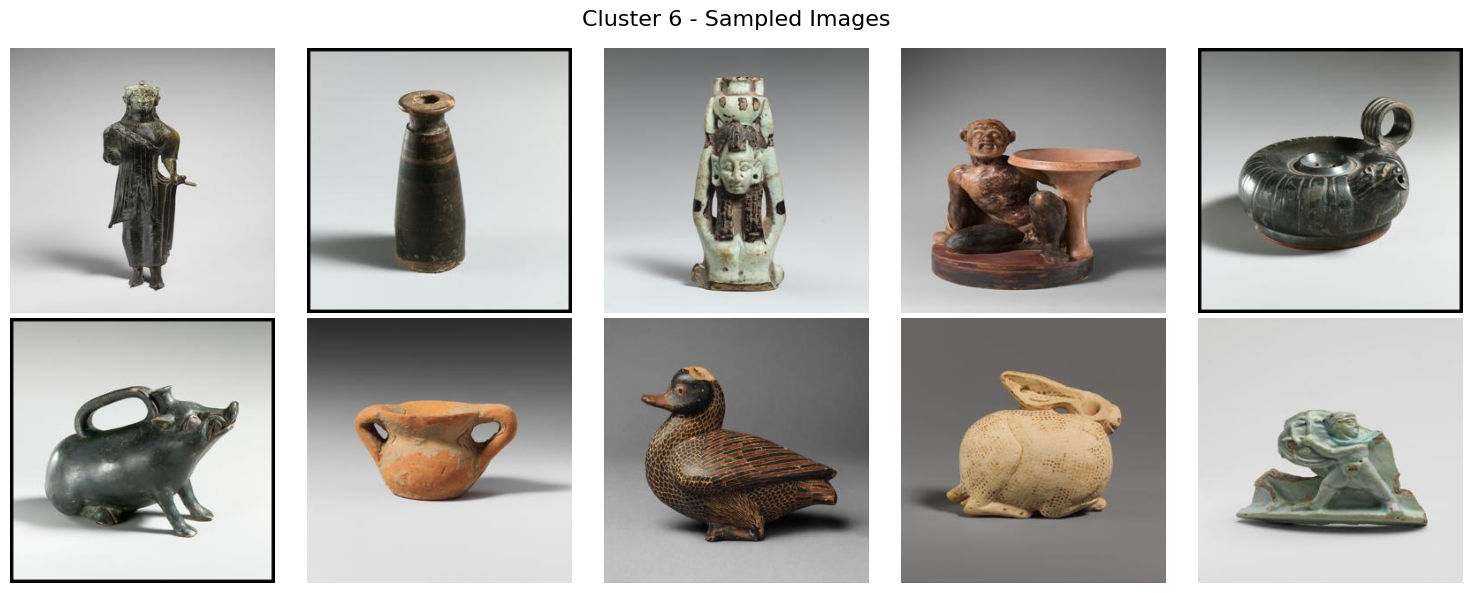

In [38]:
# Function to display images in a grid for a single cluster
def display_cluster_images(cluster_label, n=5):
    # Filter the DataFrame for the current cluster
    cluster_df = df[df['kmeans_labels'] == cluster_label]
    
    # Randomly sample n images from the cluster
    sampled_images = cluster_df.sample(n=min(n, len(cluster_df)))['file_name'].tolist()
    
    # Number of columns for the grid
    num_cols = 5
    num_rows = (len(sampled_images) + num_cols - 1) // num_cols
    
    # Create a figure for the grid
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
    axs = axs.ravel()
    
    # Iterate through sampled images and display them
    for i, img_path in enumerate(sampled_images):
        try:
            img = Image.open(img_path)
            axs[i].imshow(img)
            axs[i].axis('off')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    # Turn off remaining axes
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')
    
    plt.suptitle(f"Cluster {cluster_label} - Sampled Images", fontsize=16)
    plt.tight_layout()
    plt.show()

# Loop through each cluster and display images
unique_clusters = df['kmeans_labels'].unique()
n_images_per_cluster = 10  # Adjust the number of images per cluster here

for cluster in unique_clusters:
    display_cluster_images(cluster, n=n_images_per_cluster)

In [39]:
df['id'] = df['file_name'].apply(lambda x: int(x.split("/")[1].split(".")[0]))
df['file_name'] = df['file_name'].apply(lambda x: x.split("/")[1])

# Ensure the `id` column exists in both `data` and `df`
# Replace `id` with the actual column name used in your JSON and DataFrame
df = df.set_index('id')


In [47]:
data = json.load(open("ceramic_vases_metadata_2.json"))

In [48]:
# Iterate over the JSON entries and update them with matching rows from df
for i, entry in enumerate(data):  # Enumerate to get index for direct assignment
    entry_id = entry.get('id')  # Extract the id for the current JSON entry
    if entry_id in df.index:    # Check if the id exists in df
        # Update the entry with all columns from df
        data[i].update(df.loc[entry_id].to_dict())

In [49]:
with open("ceramic_vases_metadata_final.json", "w") as f:
    json.dump(data, f, indent=4)